In [44]:
#quantum teleportation(Title)
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex, plot_histogram
from IPython.display import Markdown
import numpy as np


|Q > = 0.7|0 > + 0.714142842854285|1 >


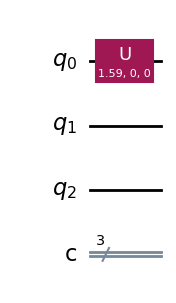

In [45]:
qc = QuantumCircuit(3,3)
#Step 0: prepare the mysterious state qubit |Q>
#Prepare the state a|0> + b|1>
a = 0.7
b = np.sqrt(1-(a**2)) #a^2+ b^2 =1
theta = 2 * np.arccos(a)
phi = 0
qc.u(theta , phi, 0, [0]) #u is for unitary
print(f'|Q > = {a}|0 > + {b}|1 >')
qc.draw("mpl")


In [46]:
# Check |\psi>
psi = Statevector(qc)
print(psi)
display(Markdown(r'Three qubit state ='),psi.draw('latex'))
array_to_latex(psi, prefix="(\\text{Three qubit state})^T = ")

print(theta)

Statevector([0.7       +0.j, 0.71414284+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j],
            dims=(2, 2, 2))


Three qubit state =

<IPython.core.display.Latex object>

1.5907976603682872


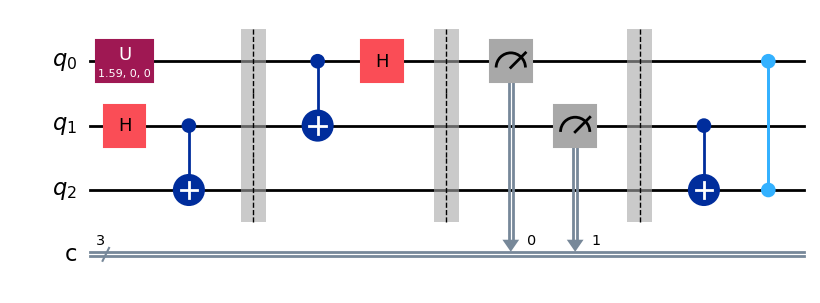

In [47]:
#Create an Entangled state between Alice(q1) and Bob(q2)
qc.h(1)
qc.cx(1,2)
qc.barrier() #put a barrier to demarcate
qc.draw("mpl")
# Step 2 : Alixe applies a series of operatin between the states q0 and q1
qc.cx(0,1)
qc.h(0)
qc.barrier()
qc.draw("mpl")
#Step3: Alice measures q0 and q1 and sends the results to Bob as Classical Bits
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
qc.draw("mpl")
#Step4 : Based on Alice's results Bob performs gates operation and measures
qc.cx(1,2)
qc.cz(0,2)
qc.draw("mpl")

In [48]:
#Simulate the circuit now
from qiskit import transpile 
# Use AerSimulator
from qiskit_aer import AerSimulator

backend = AerSimulator()

# First we have to transpile the quantum circuit 
# to the low-level QASM instructions used by the 
# backend
qc_compiled = transpile(qc, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
shots = 1000000
job_sim = backend.run(qc_compiled, shots=shots)

# Grab the results from the job.
result_sim = job_sim.result()

counts = result_sim.get_counts(qc_compiled)
print(counts)
counts_percentage = {state: int((count / shots) * 100) for state, count in counts.items()}
print(counts_percentage)
#to be done in a separate cell
backend = AerSimulator()

{'011': 250518, '000': 249469, '010': 249725, '001': 250288}
{'011': 25, '000': 24, '010': 24, '001': 25}


Text(0, 0.5, 'Percentage (%)')

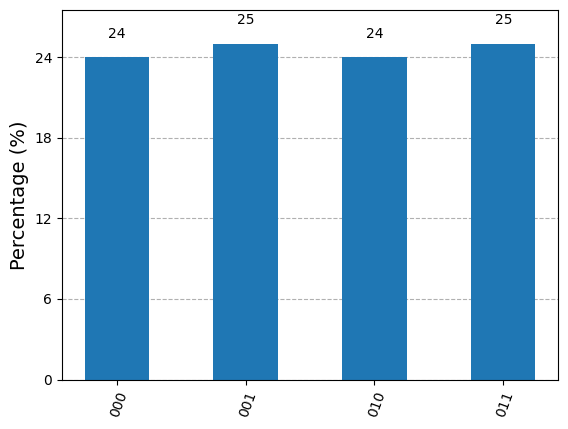

In [49]:
from qiskit.visualization import plot_histogram

fig, ax = plt.subplots()
#plot_histogram(counts, ax=ax)
plot_histogram(counts_percentage, ax=ax)
ax.set_ylabel('Percentage (%)')
